In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# from google.colab import drive
# drive.mount('/content/drive')
# # Load observed data
# data=pd.read_csv('/content/drive/MyDrive/spring2025/Modeling_Lab/[HW4]_Practical_class_4/LV_data.csv')
# t_data = data['Time'].values
# x_data = data['Prey'].values
# y_data = data['Predator'].values
# z0=[x_data[0],y_data[0]]
# z0
# # Define the Lotka-Volterra ODE system
# def lotka_volterra(z, t, α, β, γ, δ):
#   x, y = z
#   return [α*x - β*x*y,

#           δ*x*y - γ*y]
# # MSE objectives
# def objective_mse(params):
#   α, β, γ, δ = params
#   sol=odeint(lotka_volterra,z0,t_data,args=(α,β,γ,δ))
#   x_sim,y_sim=sol.T
#   mse_x=np.mean((x_sim-x_data)**2)
#   mse_y=np.mean((y_sim-y_data)**2)
#   return mse_x+mse_y



# # grid of initial guesses
# alphas=np.linspace(0,1,6) # [0,0.2,0.4,0.6,0.8,1.0]
# betas=np.linspace(0,0.21,8) # [0,0.03,...,0.21]
# gammas=np.linspace(0,1,6)
# deltas=np.linspace(0,0.21,8)
# best_error=np.inf
# best_params=None
# for alpha in alphas:
#   for beta in betas:
#     for gamma in gammas:
#       for delta in deltas:
#         init=[alpha,beta,gamma,delta]
#         res=minimize(objective_mse,init,method='Nelder-Mead',options={'maxiter':200, 'disp':False})
#         if res.fun<best_error:
#           best_error=res.fun
#           best_params=res.x


# print("▶ Best MSE =", best_error)
# print("▶ Best (α,β,γ,δ) =", best_params)

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Load observed data
data=pd.read_csv('/content/drive/MyDrive/spring2025/Modeling_Lab/[HW4]_Practical_class_4/LV_data.csv')
t_data = data['Time'].values
x_data = data['Prey'].values
y_data = data['Predator'].values
z0=[x_data[0],y_data[0]]
z0

Mounted at /content/drive


[np.float64(30.0), np.float64(4.0)]

In [3]:
# Define the Lotka-Volterra ODE system
def lotka_volterra(z, t, α, β, γ, δ):
  x, y = z
  return [α*x - β*x*y,

          δ*x*y - γ*y]


In [4]:
# MSE objectives
def objective_mse(params):
  α, β, γ, δ = params
  sol=odeint(lotka_volterra,z0,t_data,args=(α,β,γ,δ))
  x_sim,y_sim=sol.T
  mse_x=np.mean((x_sim-x_data)**2)
  mse_y=np.mean((y_sim-y_data)**2)
  return mse_x+mse_y



# grid of initial guesses
alphas=np.linspace(0,1,6) # [0,0.2,0.4,0.6,0.8,1.0]
betas=np.linspace(0,0.21,8) # [0,0.03,...,0.21]
gammas=np.linspace(0,1,6)
deltas=np.linspace(0,0.21,8)




In [5]:
best_error=np.inf
best_params=None
for alpha in alphas:
  for beta in betas:
    for gamma in gammas:
      for delta in deltas:
        init=[alpha,beta,gamma,delta]
        res=minimize(objective_mse,init,method='Nelder-Mead',options={'maxiter':200, 'disp':False})
        if res.fun<best_error:
          best_error=res.fun
          best_params=res.x


print("▶ Best MSE =", best_error)
print("▶ Best (α,β,γ,δ) =", best_params)


<ipython-input-4-0b8f0d4f46fc>:4: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol=odeint(lotka_volterra,z0,t_data,args=(α,β,γ,δ))
<ipython-input-4-0b8f0d4f46fc>:7: RuntimeWarning: overflow encountered in square
  mse_y=np.mean((y_sim-y_data)**2)


▶ Best MSE = 35.89125795857004
▶ Best (α,β,γ,δ) = [0.54752532 0.02811854 0.84318821 0.02655793]


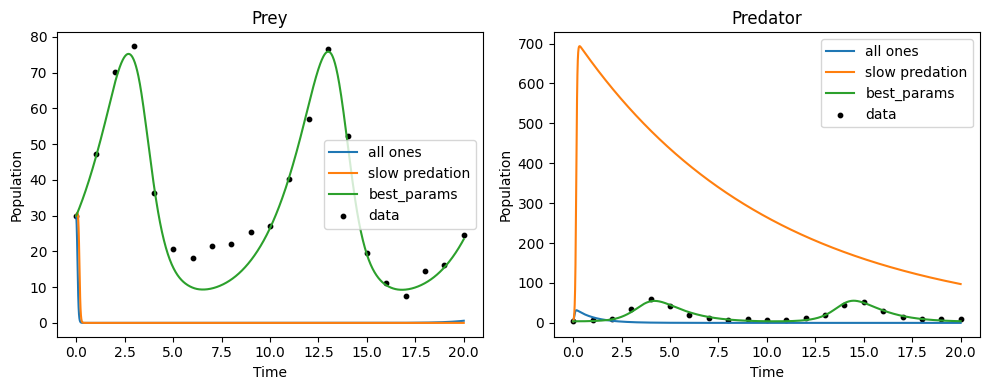

In [7]:

# Lotka–Volterra system
def lv(t, z, α, β, γ, δ):
    x, y = z
    dxdt = α * x - β * x * y
    dydt = δ * x * y - γ * y
    return [dxdt, dydt]

# Parameter sets
param_sets = {
    'all ones':  (1, 1, 1, 1),
    'slow predation': (1, 0.05, 0.1, 1),
    'best_params': (0.54752532,0.02811854, 0.84318821, 0.02655793)
}

# Initial condition and time

t_span = (0, 20)
t_eval = np.linspace(*t_span, 1000)

# Load your experimental data (already done)
# t_data, x_data, y_data = ...

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

for name, (α, β, γ, δ) in param_sets.items():
    sol = solve_ivp(lv, t_span, z0, args=(α, β, γ, δ), t_eval=t_eval)
    x_sim, y_sim = sol.y

    ax1.plot(sol.t, x_sim, label=name)
    ax2.plot(sol.t, y_sim, label=name)

# Overlay data points
ax1.scatter(t_data, x_data, c='k', s=10, label='data')
ax2.scatter(t_data, y_data, c='k', s=10, label='data')

# Axis formatting
ax1.set(title='Prey'); ax2.set(title='Predator')
for ax in (ax1, ax2):
    ax.set_xlabel('Time'); ax.set_ylabel('Population'); ax.legend()

plt.tight_layout()
plt.show()

